# Exploratory Data Analysis (EDA)

This notebook explores the processed network traffic datasets (UNSW-NB15 and simulated real-time captures) to understand their structure, distributions, and features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load processed UNSW-NB15 dataset
unsw_df = pd.read_csv('../data/processed/unsw-nb15.csv')
print('UNSW-NB15 shape:', unsw_df.shape)
unsw_df.head()

UNSW-NB15 shape: (257673, 44)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
# Load processed simulated real-time dataset
sim_df = pd.read_csv('../data/processed/simulated.csv')
print('Simulated data shape:', sim_df.shape)
sim_df.head()

Simulated data shape: (466, 7)


,timestamp,srcip,dstip,sport,dsport,proto,length
0,1.747810e+09,f18cc54ef8a3ba4c2a230deb4df7782b15022cb5cccbaa...,86ebea5b4140c737cc826205956a0f627d9a9f3dec0521...,54922,443,TCP,425
1,1.747810e+09,f18cc54ef8a3ba4c2a230deb4df7782b15022cb5cccbaa...,86ebea5b4140c737cc826205956a0f627d9a9f3dec0521...,54922,443,TCP,97
2,1.747810e+09,f18cc54ef8a3ba4c2a230deb4df7782b15022cb5cccbaa...,b3ecac3c9c0611a1eaf507cb30bb0903d63060981c3a0f...,48704,443,TCP,66
3,1.747810e+09,86ebea5b4140c737cc826205956a0f627d9a9f3dec0521...,f18cc54ef8a3ba4c2a230deb4df7782b15022cb5cccbaa...,443,54922,TCP,66
4,1.747810e+09,86ebea5b4140c737cc826205956a0f627d9a9f3dec0521...,f18cc54ef8a3ba4c2a230deb4df7782b15022cb5cccbaa...,443,54922,TCP,66


In [4]:
print('UNSW-NB15 info:')
unsw_df.info()
print('\nSimulated data info:')
sim_df.info()

UNSW-NB15 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null 

In [5]:
print('Missing values in UNSW-NB15:')
unsw_nulls = unsw_df.isnull().sum()
display(unsw_nulls)
print('\nMissing values in Simulated Data:')
sim_nulls = sim_df.isnull().sum()
display(sim_nulls)

Missing values in UNSW-NB15:


dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      


Missing values in Simulated Data:


timestamp    0
srcip        0
dstip        0
sport        0
dsport       0
proto        0
length       0
dtype: int64

In [6]:
print('UNSW-NB15 summary statistics:')
display(unsw_df.describe())
print('\nSimulated data summary statistics:')
display(sim_df.describe())

UNSW-NB15 summary statistics:


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000



Simulated data summary statistics:


,timestamp,sport,dsport,length
count,4.660000e+02,466.000000,466.000000,466.000000
mean,1.747810e+09,25037.603004,21259.594421,384.804721
std,1.001165e+01,23101.141736,23313.143233,569.840871
min,1.747810e+09,53.000000,53.000000,54.000000
25%,1.747810e+09,443.000000,443.000000,66.000000
50%,1.747810e+09,38836.000000,443.000000,97.000000
75%,1.747810e+09,44977.000000,44304.000000,351.250000
max,1.747810e+09,59531.000000,59531.000000,2962.000000


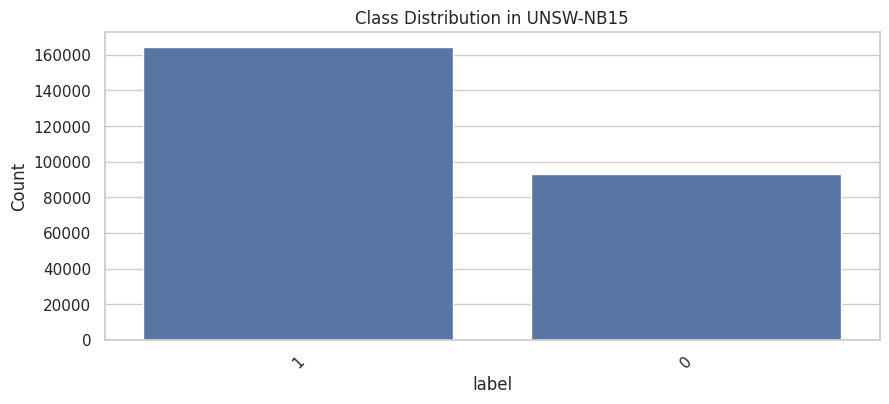

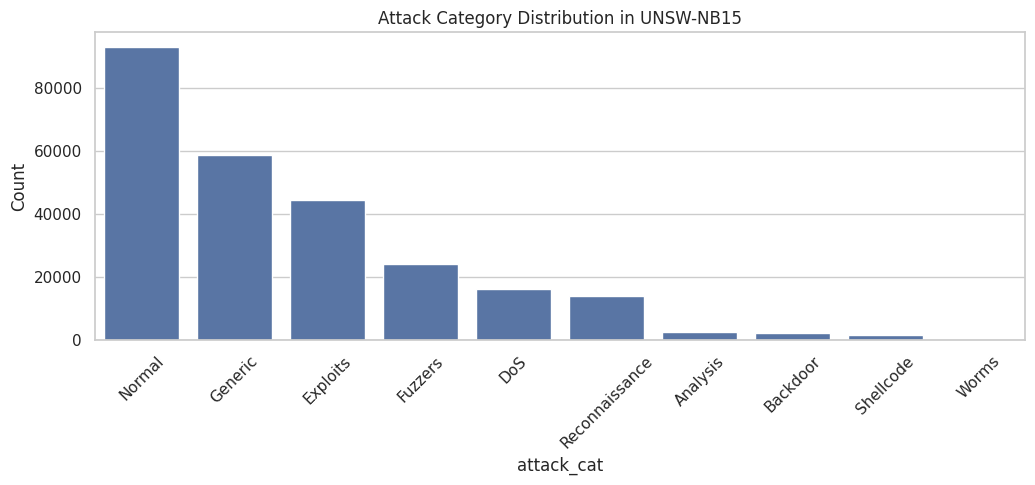

In [7]:
plt.figure(figsize=(10, 4))
sns.countplot(data=unsw_df, x='label', order=unsw_df['label'].value_counts().index)
plt.title('Class Distribution in UNSW-NB15')
plt.xlabel('label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# If there are multiple attack types, show their distribution as well
if 'attack_cat' in unsw_df.columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=unsw_df, x='attack_cat', order=unsw_df['attack_cat'].value_counts().index)
    plt.title('Attack Category Distribution in UNSW-NB15')
    plt.xlabel('attack_cat')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

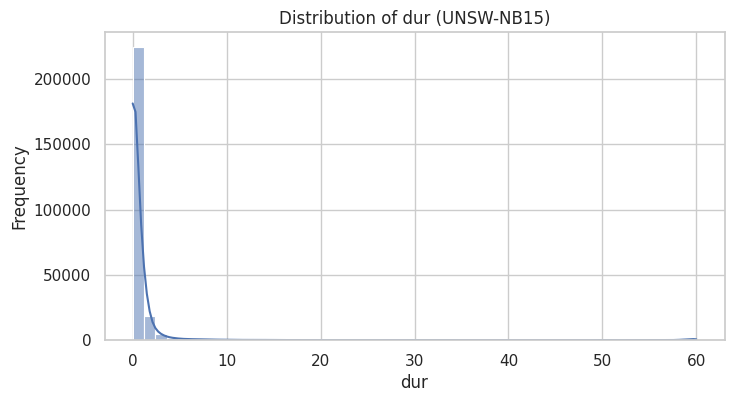

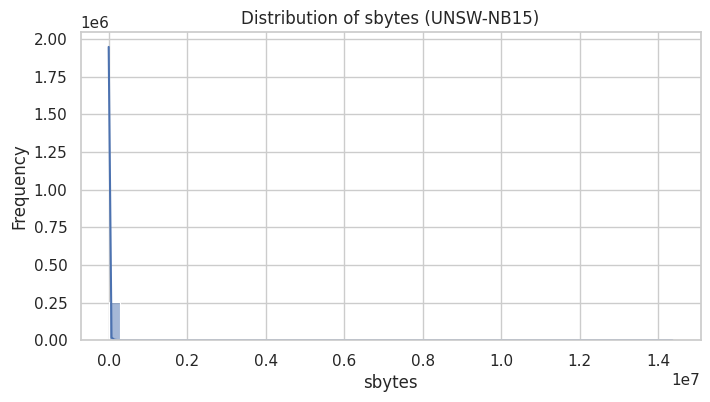

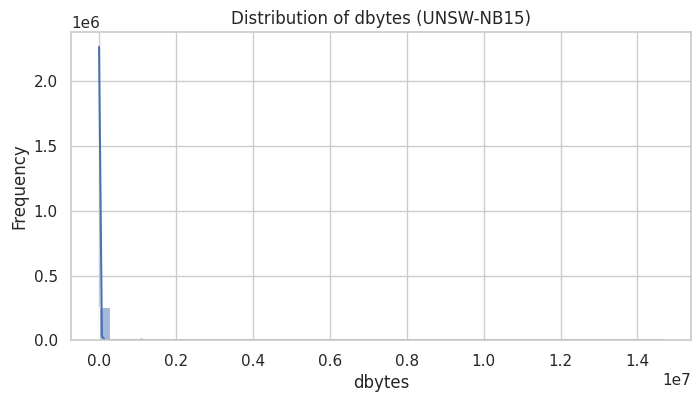

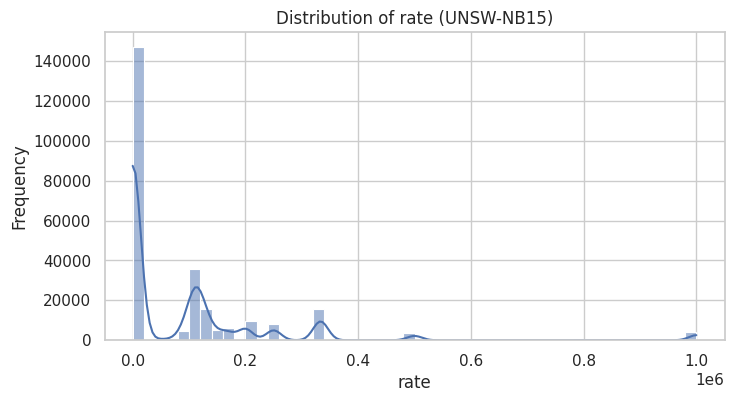

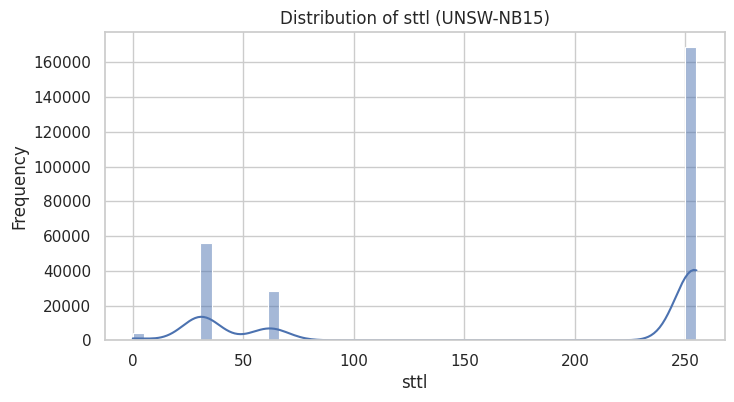

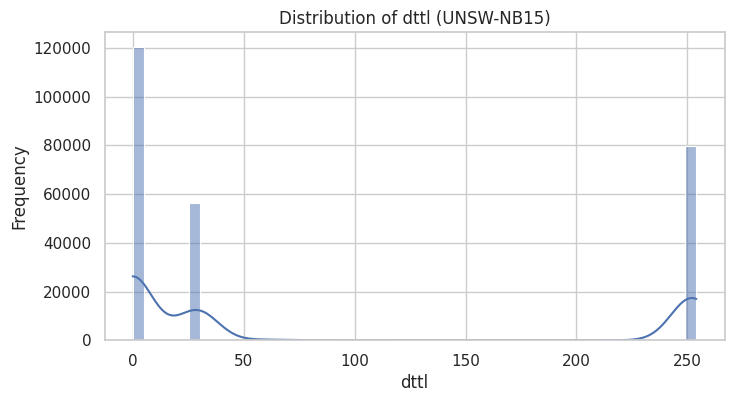

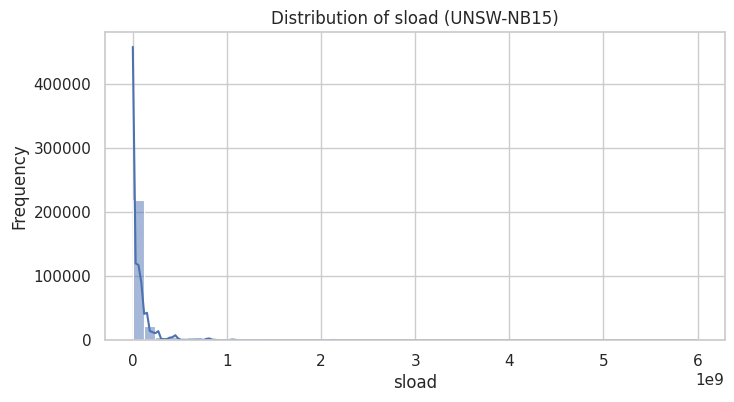

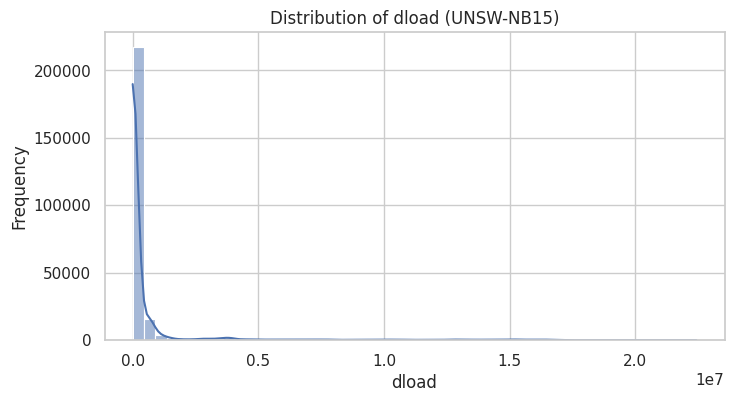

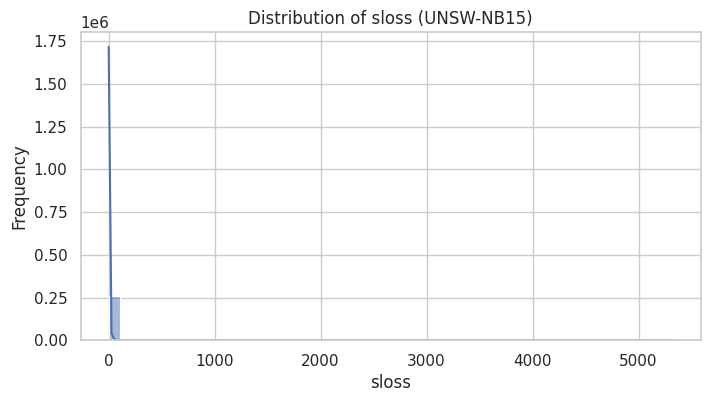

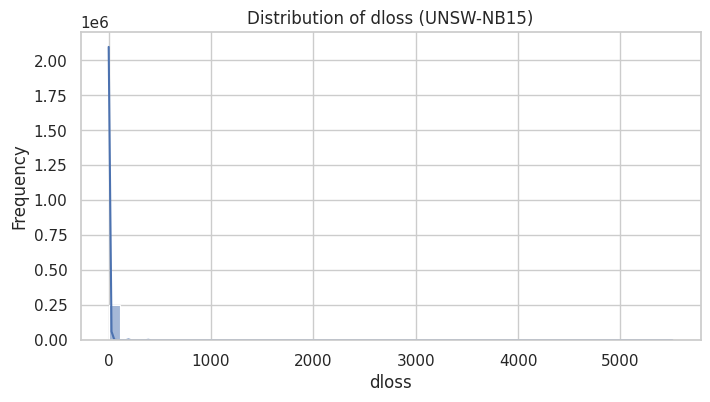

In [11]:
key_features = [
    'dur', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss'
]
for feature in key_features:
    if feature in unsw_df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(unsw_df[feature], bins=50, kde=True)
        plt.title(f'Distribution of {feature} (UNSW-NB15)')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

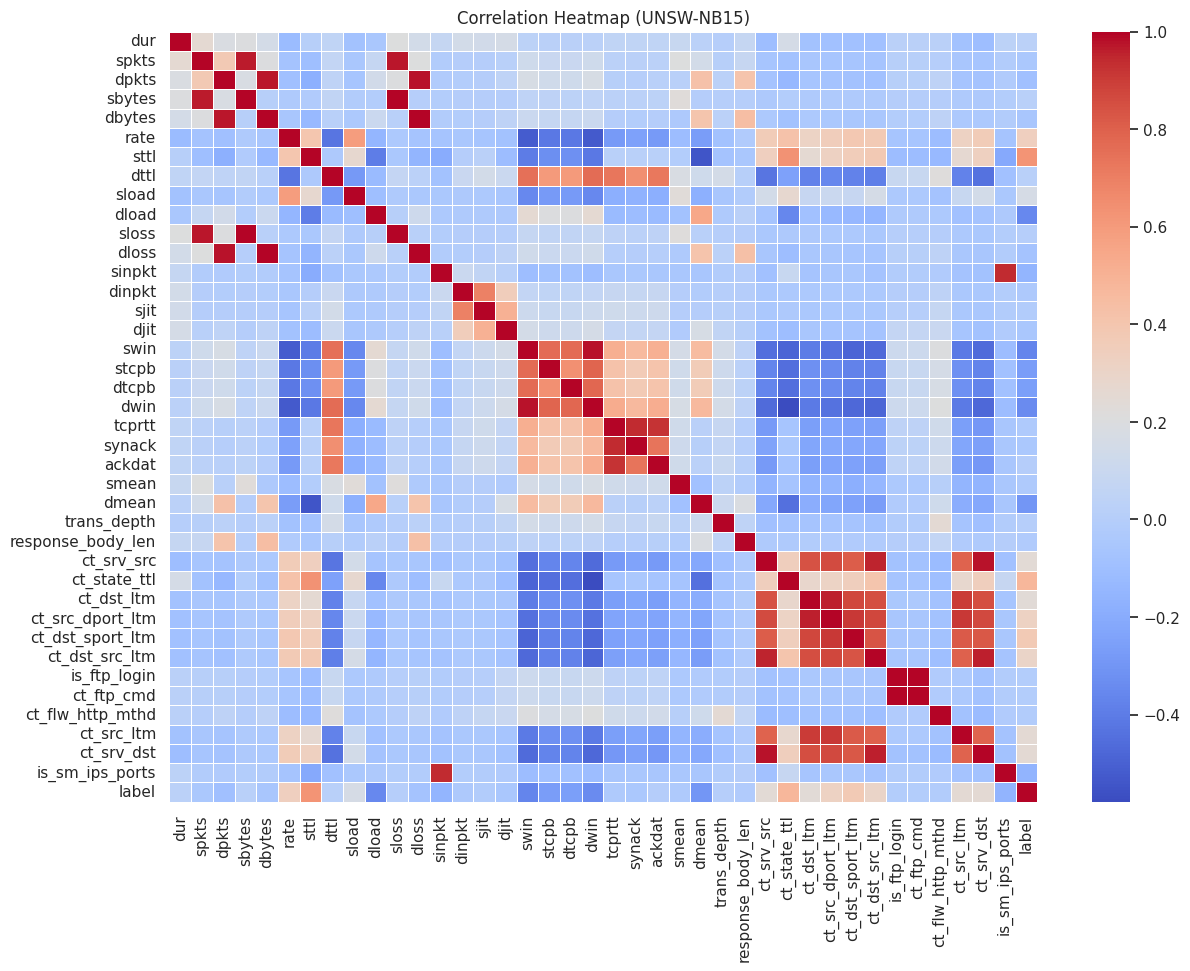

In [12]:
plt.figure(figsize=(14, 10))
corr = unsw_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (UNSW-NB15)')
plt.show()

label
1    0.639077
0    0.360923
Name: proportion, dtype: float64


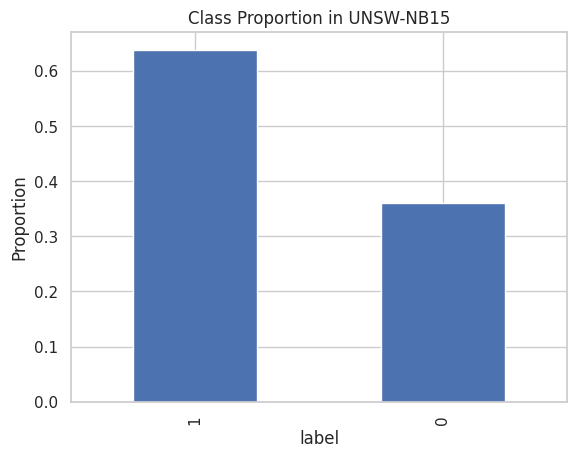

In [13]:
class_counts = unsw_df['label'].value_counts(normalize=True)
print(class_counts)
class_counts.plot(kind='bar')
plt.title('Class Proportion in UNSW-NB15')
plt.xlabel('label')
plt.ylabel('Proportion')
plt.show()

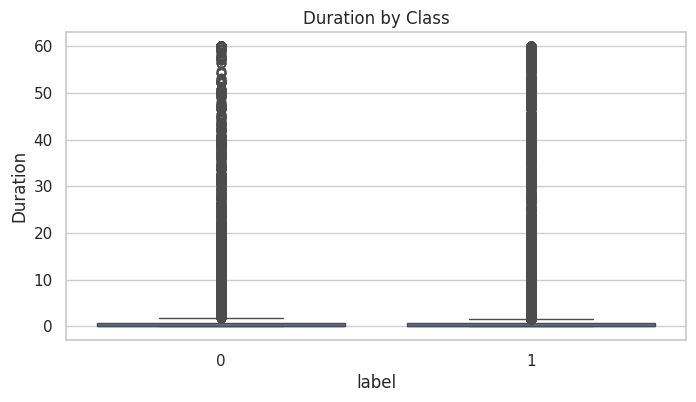

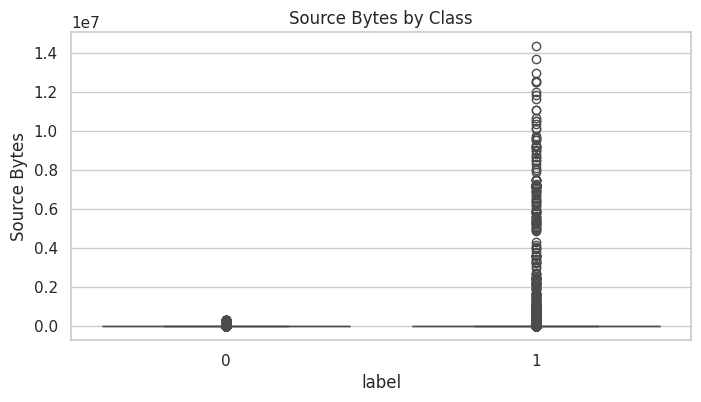

In [14]:
# Example: Distribution of 'dur' (duration) by class
if 'dur' in unsw_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=unsw_df, x='label', y='dur')
    plt.title('Duration by Class')
    plt.xlabel('label')
    plt.ylabel('Duration')
    plt.show()

# Example: Distribution of 'sbytes' (source bytes) by class
if 'sbytes' in unsw_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=unsw_df, x='label', y='sbytes')
    plt.title('Source Bytes by Class')
    plt.xlabel('label')
    plt.ylabel('Source Bytes')
    plt.show()

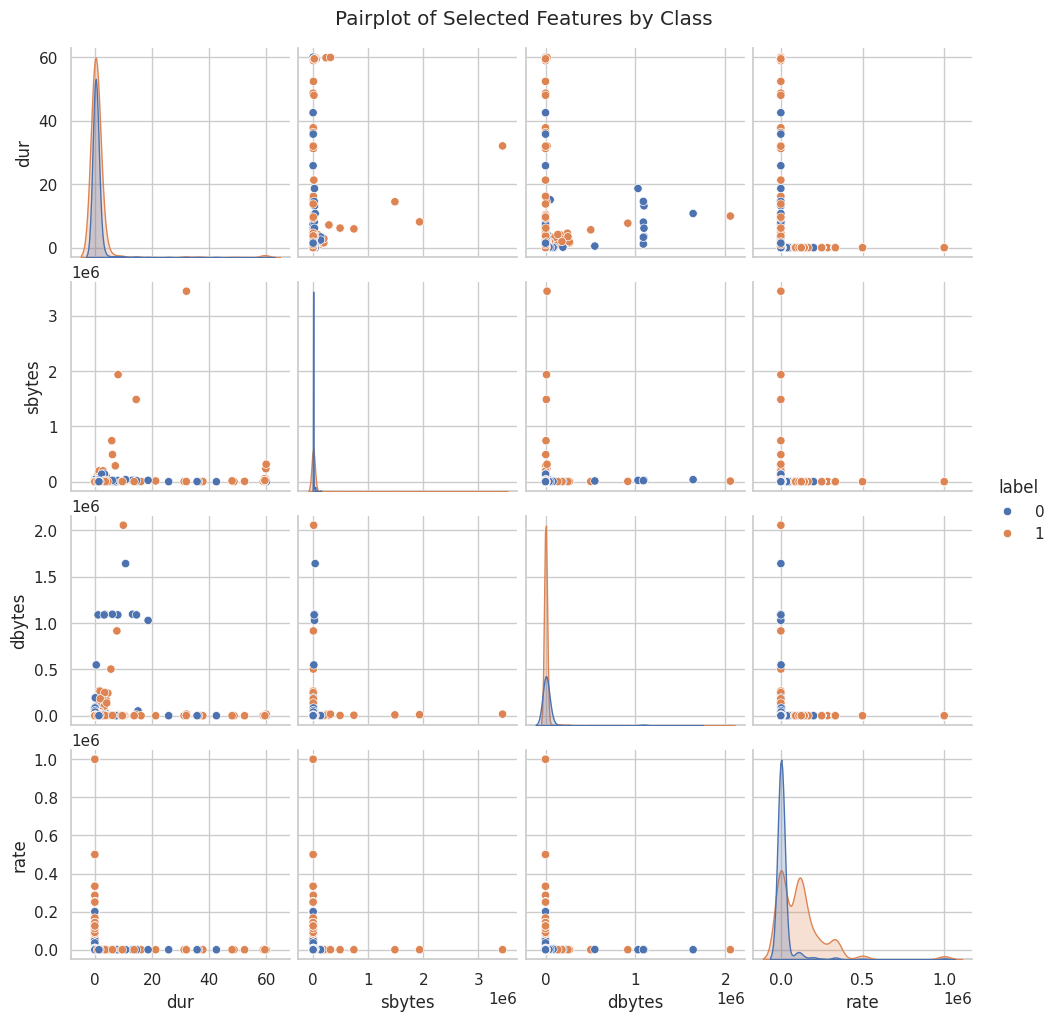

In [15]:
# Select a manageable subset for pairplot (to avoid performance issues)
pairplot_features = ['dur', 'sbytes', 'dbytes', 'rate', 'label']
subset = unsw_df[pairplot_features].sample(n=2000, random_state=42) if len(unsw_df) > 2000 else unsw_df[pairplot_features]
sns.pairplot(subset, hue='label', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Class', y=1.02)
plt.show()

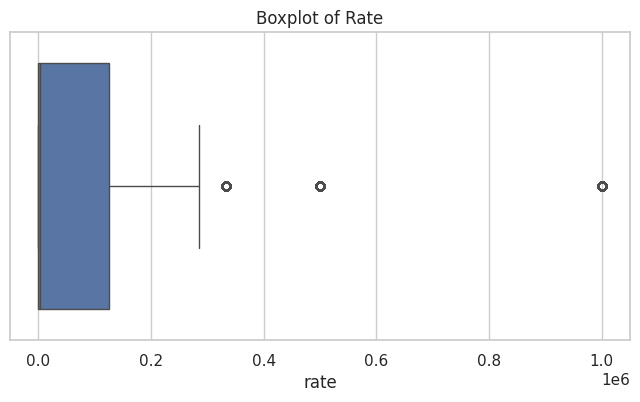

In [16]:
# Example: Boxplot for outlier detection in 'rate'
if 'rate' in unsw_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=unsw_df['rate'])
    plt.title('Boxplot of Rate')
    plt.xlabel('rate')
    plt.show()

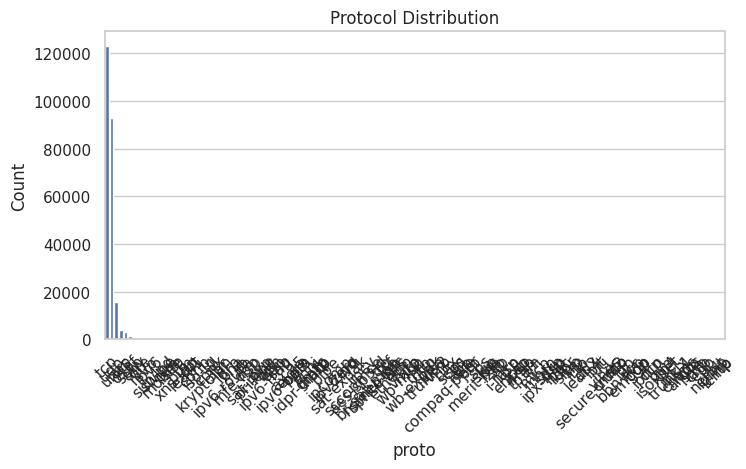

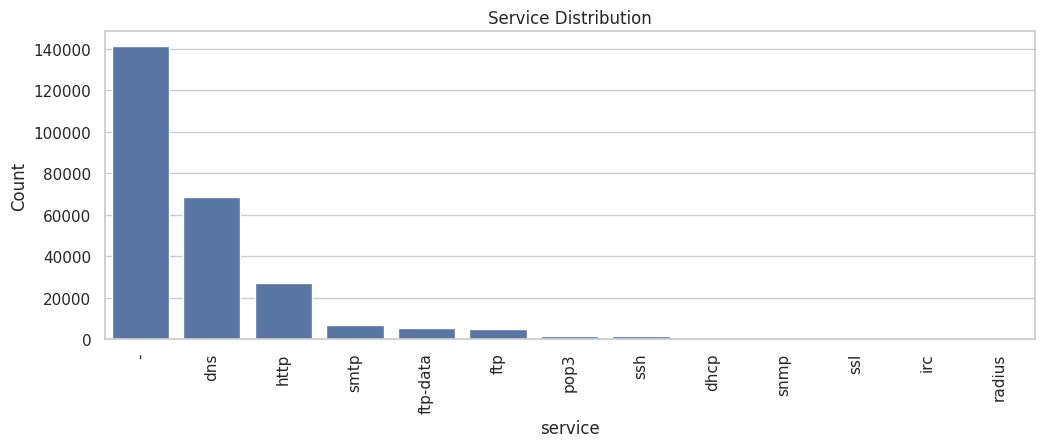

In [17]:
# Protocol distribution
if 'proto' in unsw_df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=unsw_df, x='proto', order=unsw_df['proto'].value_counts().index)
    plt.title('Protocol Distribution')
    plt.xlabel('proto')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Service distribution
if 'service' in unsw_df.columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=unsw_df, x='service', order=unsw_df['service'].value_counts().index)
    plt.title('Service Distribution')
    plt.xlabel('service')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()